In [10]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from contextlib import redirect_stdout
from pathlib import Path
import time
start_time = time.time()

In [11]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [12]:
max_features = 10000
max_len = 500
print('Loading data ...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data ...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [13]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [14]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 499us/sample - loss: 0.9016 - acc: 0.5105 - val_loss: 0.6882 - val_acc: 0.5592
Epoch 2/10
20000/20000 [==============================] - 10s 483us/sample - loss: 0.6711 - acc: 0.6534 - val_loss: 0.6680 - val_acc: 0.6532
Epoch 3/10
20000/20000 [==============================] - 10s 487us/sample - loss: 0.6294 - acc: 0.7611 - val_loss: 0.6222 - val_acc: 0.7388
Epoch 4/10
20000/20000 [==============================] - 10s 485us/sample - loss: 0.5495 - acc: 0.8109 - val_loss: 0.5182 - val_acc: 0.7836
Epoch 5/10
20000/20000 [==============================] - 10s 483us/sample - loss: 0.4299 - acc: 0.8448 - val_loss: 0.4232 - val_acc: 0.8328
Epoch 6/10
20000/20000 [==============================] - 10s 491us/sample - loss: 0.3548 - acc: 0.8741 - val_loss: 0.4000 - val_acc: 0.8474
Epoch 7/10
20000/20000 [==============================] - 10s 487us/sample - loss: 0.3060 - acc: 0.8940 -

In [15]:
summary_file = results_dir.joinpath('Assignment_10.4_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [16]:
result_model_file = results_dir.joinpath('pre_trained_glove_model_1D_Convnet.h5')
model.save_weights(result_model_file)

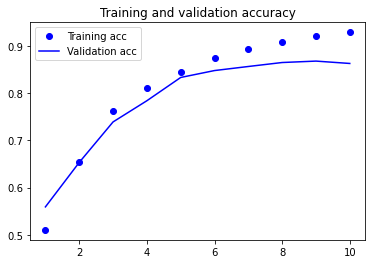

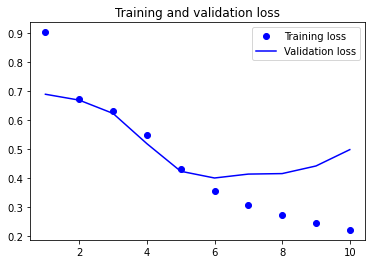

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.4_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [18]:
model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)


[0.4851817837047577, 0.86012]
